In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 
              'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 
              'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe


In [3]:
sales = pd.read_csv('kc_house_data.csv', dtype=dtype_dict, parse_dates=['date'])
sales = sales.sort_values(['sqft_living','price']).reset_index(drop=True)
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3980300371,2014-09-26,142000.0,0.0,0.00,290.0,20875,1,0,0,...,1,290,0,1963,0,98024,47.5308,-121.888,1620.0,22850.0
1,2856101479,2014-07-01,276000.0,1.0,0.75,370.0,1801,1,0,0,...,5,370,0,1923,0,98117,47.6778,-122.389,1340.0,5000.0
2,1723049033,2014-06-20,245000.0,1.0,0.75,380.0,15000,1,0,0,...,5,380,0,1963,0,98168,47.4810,-122.323,1170.0,15000.0
3,1222029077,2014-10-29,265000.0,0.0,0.75,384.0,213444,1,0,0,...,4,384,0,2003,0,98070,47.4177,-122.491,1920.0,224341.0
4,6896300380,2014-10-02,228000.0,0.0,1.00,390.0,5900,1,0,0,...,4,390,0,1953,0,98118,47.5260,-122.261,2170.0,6000.0


In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
def polyfit(df, degree, plot=True):
    poly_data = polynomial_dataframe(df['sqft_living'], degree)
    poly_data['price'] = df['price']
    model = LinearRegression()
    features = [x for x in poly_data.columns if x != 'price']
    model.fit(X=poly_data[features], y=poly_data['price'])
    print('R^2 is: {:6.5f}'.format(model.score(poly_data[features], poly_data['price'])))
    if plot:
        plt.figure()
        plt.plot(poly_data['power_1'],poly_data['price'],'.',
        poly_data['power_1'], model.predict(poly_data[[x for x in poly_data.columns if x != 'price']]),'-')
        plt.show()
        print(model.coef_)
    return model

R^2 is: 0.49285


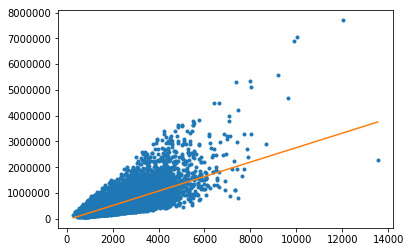

[ 280.6235679]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
polyfit(sales, 1)

R^2 is: 0.53274


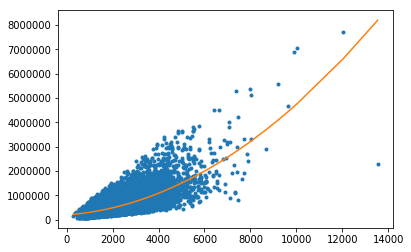

[  6.79940947e+01   3.85812609e-02]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
polyfit(sales, 2)

R^2 is: 0.09087


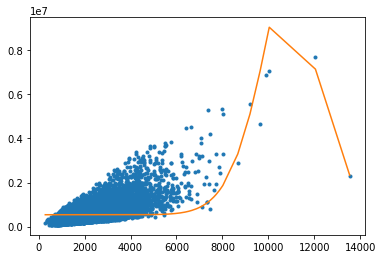

[  4.56404164e-91   6.91713465e-51  -5.84668428e-56  -4.97841222e-60
   0.00000000e+00   2.68575170e-71   2.26147568e-67   1.85900299e-63
   1.47144116e-59   1.09771012e-55   7.43509038e-52   4.23015578e-48
   1.61618577e-44  -2.49283826e-48   9.59718336e-53]


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
polyfit(sales, 15)

In [9]:
df_1 = pd.read_csv('wk3_kc_house_set_1_data.csv', dtype=dtype_dict, parse_dates=['date'])
df_2 = pd.read_csv('wk3_kc_house_set_2_data.csv', dtype=dtype_dict, parse_dates=['date'])
df_3 = pd.read_csv('wk3_kc_house_set_3_data.csv', dtype=dtype_dict, parse_dates=['date'])
df_4 = pd.read_csv('wk3_kc_house_set_4_data.csv', dtype=dtype_dict, parse_dates=['date'])

R^2 is: 0.15740


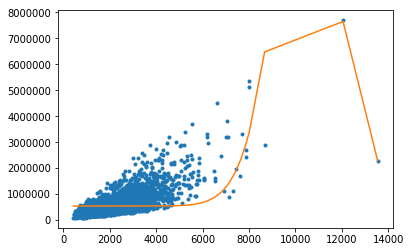

[  3.05794168e-90  -1.69394946e-49   2.35916781e-55   0.00000000e+00
   0.00000000e+00   1.10358351e-70   8.37724029e-67   6.23411957e-63
   4.49156442e-59   3.06938763e-55   1.91749300e-51   1.01335180e-47
   3.62176959e-44  -5.63501661e-48   2.18641116e-52]
R^2 is: 0.26656


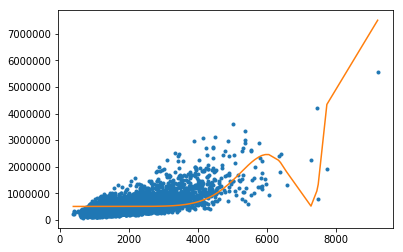

[  2.71335949e-77   7.33541093e-39  -1.85014904e-44   8.43131468e-50
  -2.08809743e-53   0.00000000e+00   3.64549213e-55   1.50416258e-51
   5.76015665e-48   1.95770497e-44   5.39396539e-41   9.40376360e-38
  -3.63529141e-41   4.65476524e-45  -1.97192091e-49]
R^2 is: 0.21676


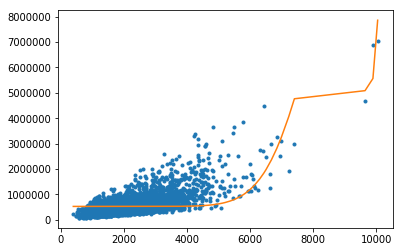

[  2.83751934e-88  -7.80224129e-49   2.90781137e-55  -7.96545956e-59
   0.00000000e+00   4.27894986e-69   2.68009626e-65   1.63911362e-61
   9.66435015e-58   5.38044653e-54   2.72563636e-50   1.16253248e-46
   3.33756141e-43  -6.76238818e-47   3.43132932e-51]
R^2 is: 0.29811


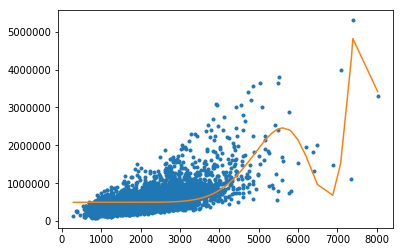

[  1.37116050e-76   2.79675964e-40  -4.25058440e-44   6.70485153e-50
  -4.17619486e-53   0.00000000e+00   1.27070051e-54   4.87868972e-51
   1.73549021e-47   5.47058320e-44   1.39587599e-40   2.25041871e-37
  -9.43954118e-41   1.31573060e-44  -6.09155443e-49]


In [10]:
for df in [df_1, df_2, df_3, df_4]:
    polyfit(df, 15)

In [11]:
train = pd.read_csv('wk3_kc_house_train_data.csv')
validation = pd.read_csv('wk3_kc_house_valid_data.csv')
test = pd.read_csv('wk3_kc_house_test_data.csv')

In [12]:
all_rss_train = []
all_rss_validation = []
all_rss_test = []
for d in range(1, 16):
    model = polyfit(train, d, plot=False)
    poly_train = polynomial_dataframe(train['sqft_living'], d)
    poly_train['price'] = train['price']
    poly_validation = polynomial_dataframe(validation['sqft_living'], d)
    poly_validation['price'] = validation['price']
    poly_test = polynomial_dataframe(test['sqft_living'], d)
    poly_test['price'] = test['price']
    
    rss_train = np.sum(np.square(model.predict(poly_train[[x for x in poly_train.columns 
                                                                     if x != 'price']])
                                      - poly_train['price']))
    rss_validation = np.sum(np.square(model.predict(poly_validation[[x for x in poly_validation.columns 
                                                                     if x != 'price']])
                                      - poly_validation['price']))
    rss_test = np.sum(np.square(model.predict(poly_test[[x for x in poly_test.columns 
                                                                     if x != 'price']])
                                      - poly_test['price']))
    all_rss_train.append(rss_train)
    all_rss_validation.append(rss_validation)
    all_rss_test.append(rss_test)

R^2 is: 0.49710
R^2 is: 0.56063
R^2 is: 0.56064
R^2 is: 0.56066
R^2 is: 0.56066
R^2 is: 0.56168
R^2 is: 0.56067
R^2 is: 0.54633
R^2 is: 0.51287
R^2 is: 0.46510
R^2 is: 0.41235
R^2 is: 0.36163
R^2 is: 0.18673
R^2 is: 0.17057
R^2 is: 0.15823


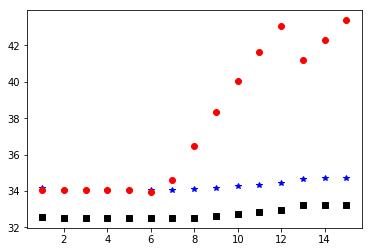

In [13]:
plt.figure()
plt.plot(np.linspace(1, 15, 15), np.log(all_rss_train), 'b*')
plt.plot(np.linspace(1, 15, 15), np.log(all_rss_validation), 'ro')
plt.plot(np.linspace(1, 15, 15), np.log(all_rss_test), 'ks')

In [14]:
np.argmin(all_rss_validation)

5

In [15]:
np.argmin(all_rss_test)

6

In [18]:
print('{:6.3e}'.format(all_rss_test[5]))

1.352e+14
